In [1]:

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint,solve_ivp
from scipy.interpolate import RegularGridInterpolator
from time import time
import matplotlib as mpl
import sys

import ray_transfer_matrix as rtm
import particle_tracker as pt

mpl.rcParams['figure.dpi'] = 300

Make the electron cube and calculate gradients

In [24]:
    
ne_extent = 5e-3
N_V = 100
M_V = 2*N_V+1
ne_x = np.linspace(-ne_extent,ne_extent,M_V)
ne_y = np.linspace(-ne_extent,ne_extent,M_V)
ne_z = np.linspace(-ne_extent,ne_extent,M_V)

ec = pt.ElectronCube(ne_x,ne_y,ne_z,ne_extent)
ec.test_exponential_cos() #test linear electron density

ec.calc_dndr()



Make beam and propagate through the cube

In [ ]:
Np = 90000
beam_size = 5e-3
divergence= 0.05e-3


beam = pt.init_beam(Np = Np, beam_size= beam_size, divergence = divergence, ne_extent = ne_extent)
# Propogate rays through ne_cube
prop_beam = ec.solve(beam) # output of solve is the rays in (x, theta, y, phi) format
# Save memory by deleting initial ray positions
#
prop_beam[0:4:2,:] *= 1e2

Ray trace completed in:	 10.890255451202393 s


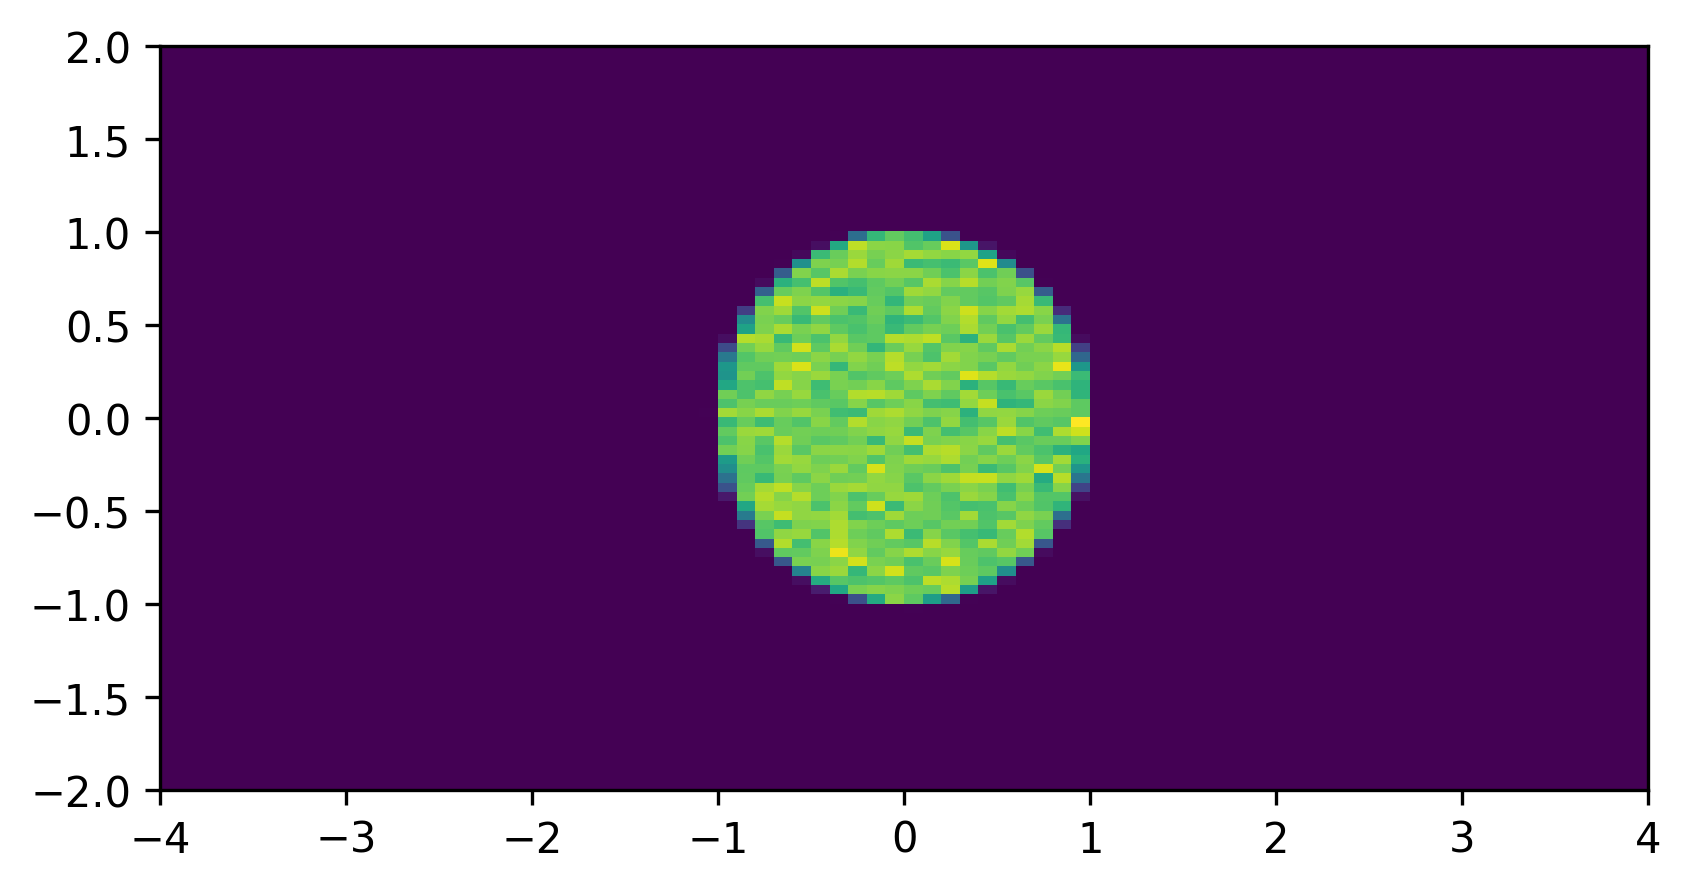

In [ ]:


beam0 , _ = pt.ray_to_Jonesvector(beam, ne_extent)

beam0[0:4:2,:] *= 1e2
sh0 = rtm.ShadowgraphyRays(beam0)
sh0.solve()
sh0.histogram(pix_x = 800, pix_y = 800)
fig, ax = plt.subplots()
sh0.plot(ax)


check beam

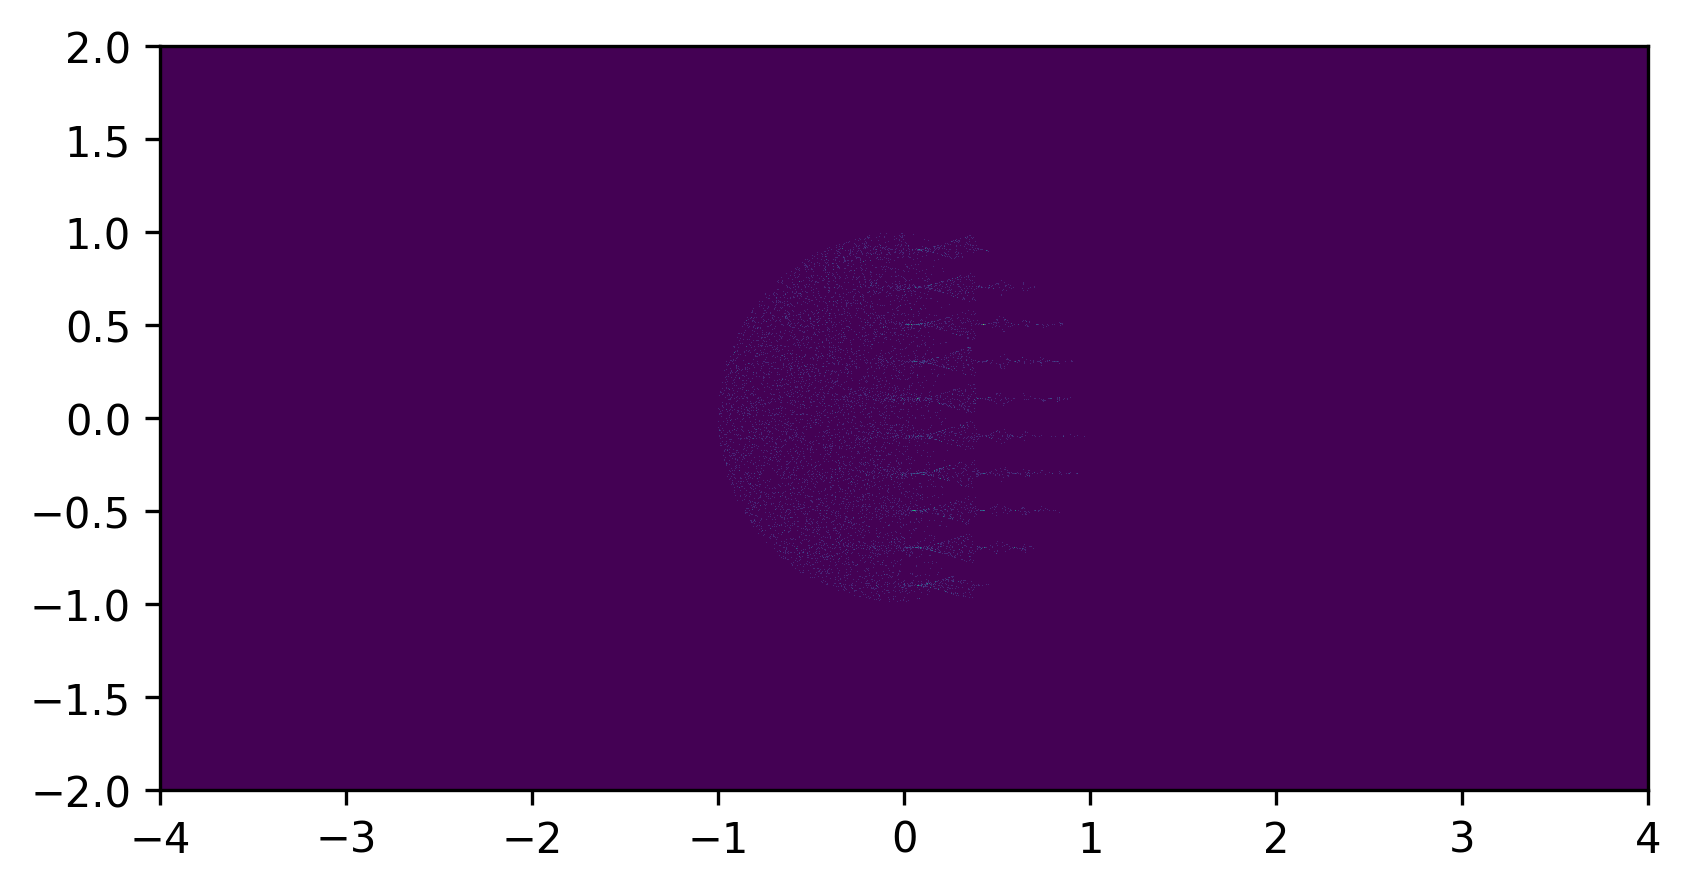

In [ ]:
prop_beam_1 = prop_beam.copy()


sh1 = rtm.ShadowgraphyRays(prop_beam_1)
sh1.solve(displacement = 0)
sh1.histogram(bin_scale = 1)
fig, ax = plt.subplots()
sh1.plot(ax)
del sh1


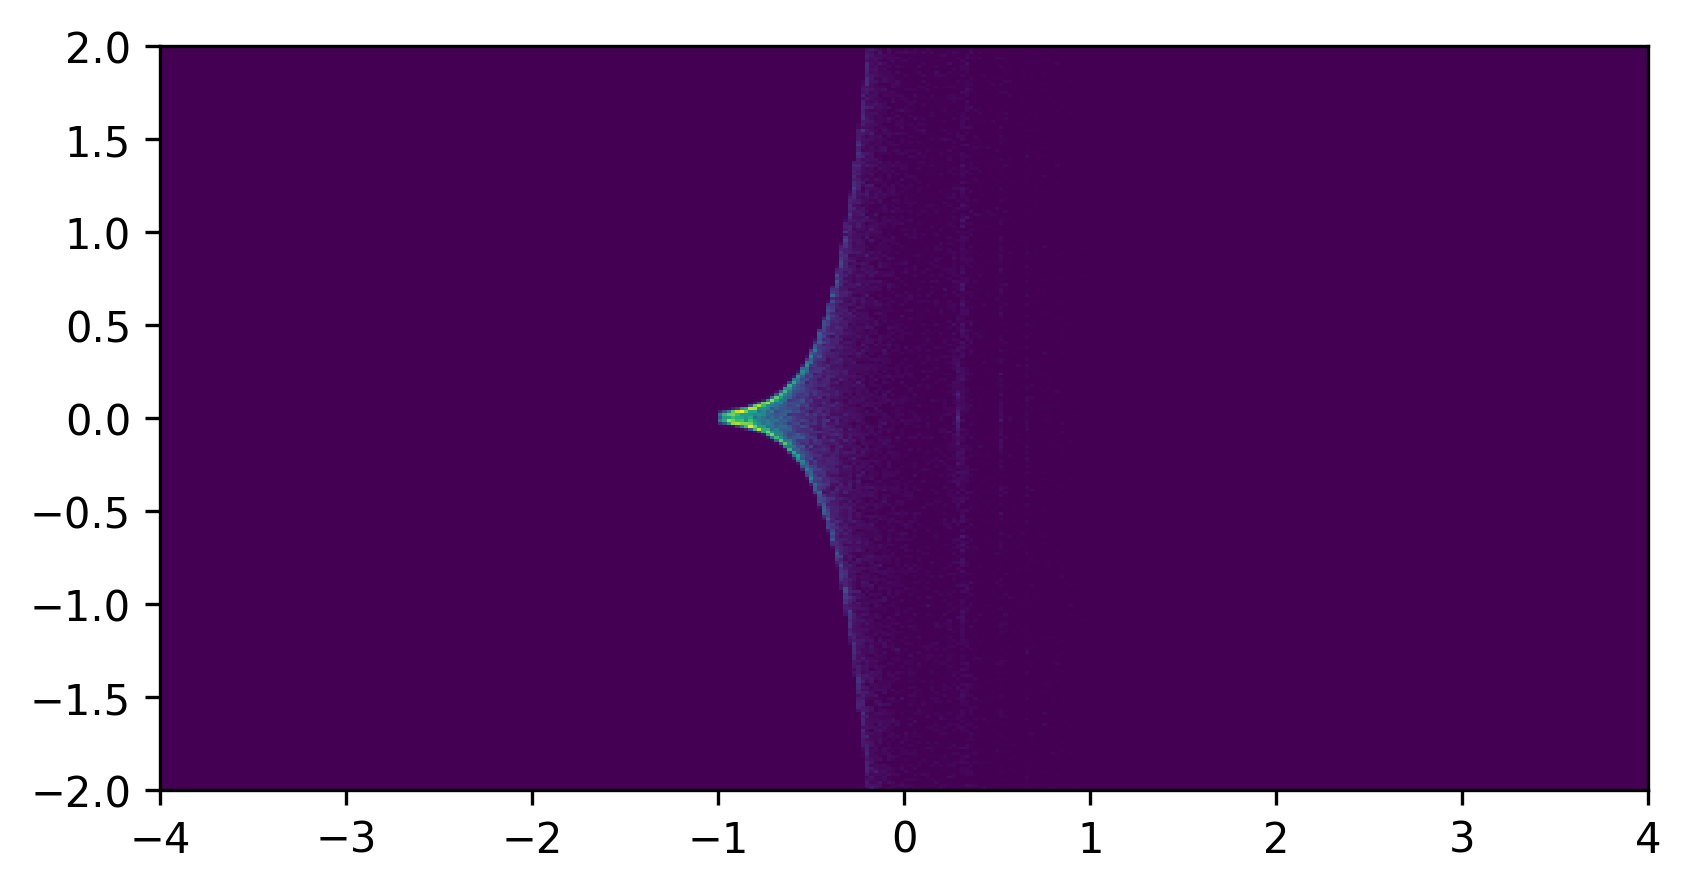

In [ ]:
import ray_transfer_matrix as rtm
sh1 = rtm.RefractometerRays(prop_beam_1)
sh1.solve(displacement = 0)
sh1.histogram()
fig, ax = plt.subplots()
sh1.plot(ax)

In [ ]:

import pyvista as pv
import gstools as gs

values = ec.ne


# Create the spatial reference
grid = pv.ImageData()

# Set the grid dimensions: shape + 1 because we want to inject our values on
#   the CELL data
grid.dimensions = np.array(values.shape) + 1

# Edit the spatial reference
grid.origin = (0, 0, 0)  # The bottom left corner of the data set
grid.spacing = (1, 1, 1)  # These are the cell sizes along each axis

# Add the data values to the cell data
grid.cell_data["values"] = values.flatten(order="F")  # Flatten the array

# Now plot the grid
grid.plot(show_edges=False)

Widget(value='<iframe src="http://localhost:57568/index.html?ui=P_0x1ad9725d220_0&reconnect=auto" class="pyvis…

In [ ]:
ec.export_as_pvti('ne', fname = r'c:\Users\UROP\Desktop\test')

In [ ]:
import pyvista as pv


class MyCustomRoutine:
    def __init__(self, mesh):
        self.output = mesh  # Expected PyVista mesh type
        # default parameters
        self.kwargs = {
            'radius': 0.5,
            'theta_resolution': 30,
            'phi_resolution': 30,
        }

    def __call__(self, param, value):
        self.kwargs[param] = value
        self.update()

    def update(self):
        # This is where you call your simulation
        result = pv.Sphere(**self.kwargs)
        self.output.copy_from(result)
        return
    

starting_mesh = pv.Sphere()
engine = MyCustomRoutine(starting_mesh)



p = pv.Plotter()
p.add_mesh(starting_mesh, show_edges=True)
p.add_slider_widget(
    callback=lambda value: engine('x slice', value),
    rng=[3, 60],
    value=30,
    title="Phi Resolution",
    pointa=(0.025, 0.1),
    pointb=(0.31, 0.1),
    style='modern',
)
p.add_slider_widget(
    callback=lambda value: engine('y slice', value),
    rng=[3, 60],
    value=30,
    title="Theta Resolution",
    pointa=(0.35, 0.1),
    pointb=(0.64, 0.1),
    style='modern',
)
p.add_slider_widget(
    callback=lambda value: engine('z slice', value),
    rng=[0.1, 1.5],
    value=0.5,
    title="Radius",
    pointa=(0.67, 0.1),
    pointb=(0.98, 0.1),
    style='modern',
)
p.show()

c:\Users\UROP\miniconda3\envs\local_env\Lib\site-packages\pyvista\core\utilities\misc.py:207: UserWarning: Encountered issue in callback (most recent call last):
  File "C:\Users\UROP\AppData\Local\Temp\ipykernel_21380\969437863.py", line 33, in <lambda>
    callback=lambda value: engine('x slice', value),
                           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\UROP\AppData\Local\Temp\ipykernel_21380\969437863.py", line 16, in __call__
    self.update()
  File "C:\Users\UROP\AppData\Local\Temp\ipykernel_21380\969437863.py", line 20, in update
    result = pv.Sphere(**self.kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: Sphere() got an unexpected keyword argument 'x slice'
  warnings.warn(formatted_exception)
c:\Users\UROP\miniconda3\envs\local_env\Lib\site-packages\pyvista\core\utilities\misc.py:207: UserWarning: Encountered issue in callback (most recent call last):
  File "C:\Users\UROP\AppData\Local\Temp\ipykernel_21380\969437863.py", line 42, in <lambda>
    c

Widget(value='<iframe src="http://localhost:57568/index.html?ui=P_0x1ad97050620_1&reconnect=auto" class="pyvis…

Ray trace completed in:	 0.06308102607727051 s
-7.365438395869125


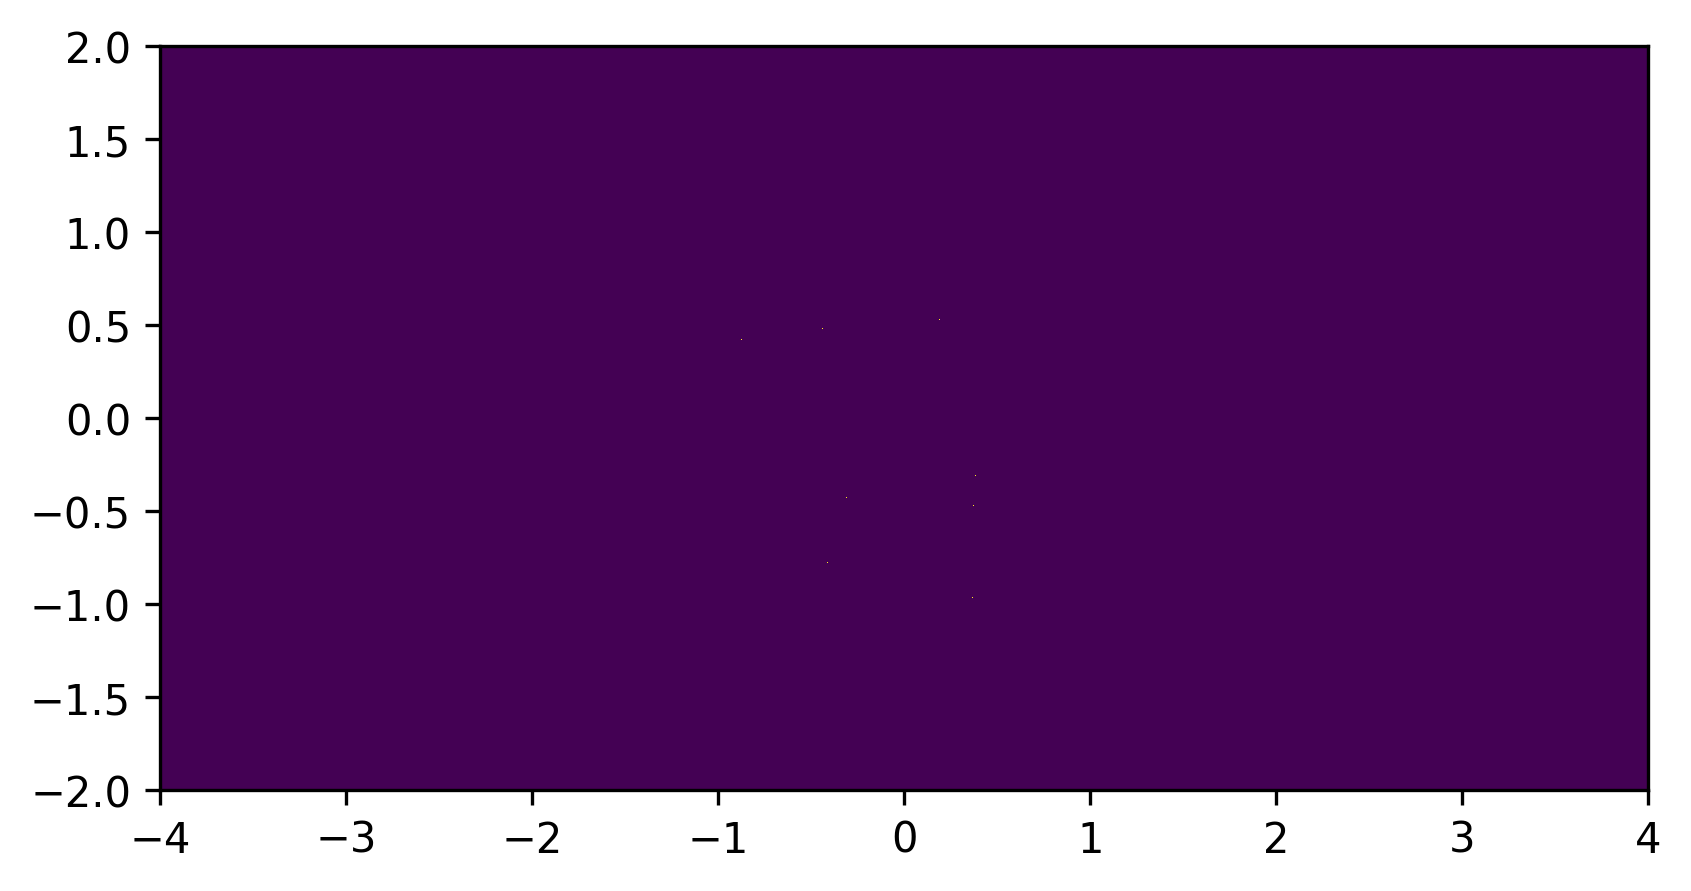

In [3]:
ne_extent = 5e-3
N_V = 100
M_V = 2*N_V+1
ne_x = np.linspace(-ne_extent,ne_extent,M_V)
ne_y = np.linspace(-ne_extent,ne_extent,M_V)
ne_z = np.linspace(-ne_extent,ne_extent,M_V)

ec = pt.ElectronCube(ne_x,ne_y,ne_z,ne_extent)
ec.test_exponential_cos() #test linear electron density

ec.calc_dndr()

Np = 100
beam_size = 5e-3
divergence= 0.05e-3


beam = pt.init_beam(Np = Np, beam_size= beam_size, divergence = divergence, ne_extent = ne_extent)
# Propogate rays through ne_cube
prop_beam = ec.solve(beam) # output of solve is the rays in (x, theta, y, phi) format
# Save memory by deleting initial ray positions
#
prop_beam[0:4:2,:] *= 1e2
print(np.sum(prop_beam))
sh1 = rtm.ShadowgraphyRays(prop_beam)
sh1.solve(displacement = 0)
sh1.histogram(bin_scale = 1)
fig, ax = plt.subplots()
sh1.plot(ax)
